In [138]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve


In [139]:
data = pd.read_csv("/Users/ROG/Desktop/master_1/Machine/FouthHomeWork/telecom.csv")
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [141]:
#数据类型转换：将Churn列的数据类型转换为整数类型（int64），这通常是为了确保后续分析和建模时数据类型的正确性。
data["Churn"] = data["Churn"].astype("int64")
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [142]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [143]:
#计算流失用户的平均值：创建一个名为abons_stat的Series，计算所有流失用户（Churn为1）的各个数值列的平均值。
abons_stat = pd.Series(data[data["Churn"] == 1].mean(numeric_only=True), name="abons")

In [144]:
#计算非流失用户的平均值：创建一个名为disertirs_stat的Series，计算所有非流失用户（Churn为0）的各个数值列的平均值。
disertirs_stat = pd.Series(
    data[data["Churn"] == 0].mean(numeric_only=True), name="disertirs"
)

In [145]:
#计算比例：创建一个名为ratio的Series，计算非流失用户与流失用户的平均值比例，便于比较两类用户的特征差异。
ratio = pd.Series(disertirs_stat / abons_stat, name="ratio")

In [146]:
#合并和排序：将abons_stat、disertirs_stat和ratio合并成一个数据框，并按ratio列的值进行排序，以便查看特征的差异。
pd.concat([abons_stat, disertirs_stat, ratio], axis=1).sort_values(by="ratio")


,abons,disertirs,ratio
Churn,1.000000,0.000000,0.000000
Customer service calls,2.229814,1.449825,0.650200
Total day minutes,206.914079,175.175754,0.846611
Total day charge,35.175921,29.780421,0.846614
Total eve minutes,212.410145,199.043298,0.937071
Total eve charge,18.054969,16.918909,0.937078
Total intl charge,2.889545,2.743404,0.949424
Total intl minutes,10.700000,10.158877,0.949428
Total night charge,9.235528,9.006074,0.975155
Total night minutes,205.231677,200.133193,0.975157


In [147]:
#交叉表分析：创建一个交叉表，显示流失与非流失用户在International plan（国际计划）上的分布情况，帮助我们了解该特征与流失的关系。
pd.crosstab(data["Churn"], data["International plan"])

International plan,No,Yes
Churn,,
0,2664,186
1,346,137


<Axes: xlabel='International plan', ylabel='count'>

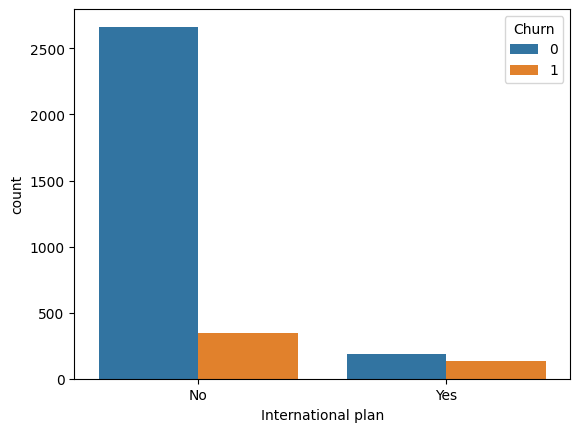

In [148]:
sns.countplot(x="International plan", hue="Churn", data=data)

In [149]:
#归一化交叉表：创建一个归一化的交叉表，显示流失与非流失用户在Voice mail plan（语音邮件计划）上的比例，便于比较。
#使用 margins=True：可以获得每行和每列的总和，便于快速分析数据的整体分布。
pd.crosstab(data["Churn"], data["Voice mail plan"], normalize=True)

Voice mail plan,No,Yes
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


<Axes: xlabel='Voice mail plan', ylabel='count'>

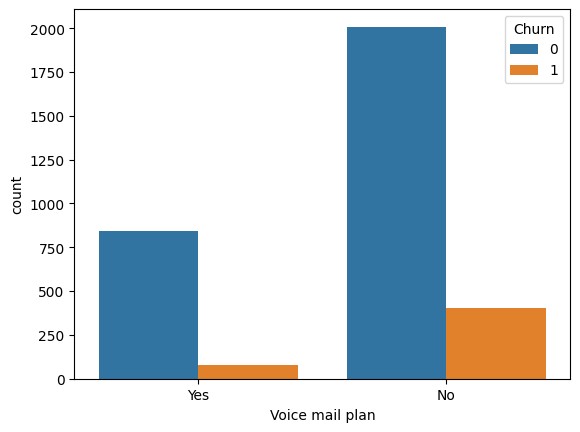

In [150]:
sns.countplot(x="Voice mail plan", hue="Churn", data=data)

In [151]:
#带边际的交叉表：创建一个交叉表，显示流失与非流失用户在International plan上的分布，并添加边际总和，便于查看总数。
pd.crosstab(data["Churn"], data["International plan"], margins=True)

International plan,No,Yes,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


<Axes: xlabel='International plan', ylabel='count'>

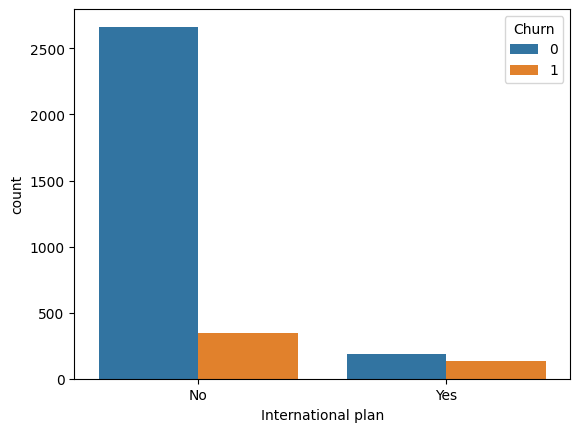

In [152]:
sns.countplot(x="International plan", hue="Churn", data=data)

In [153]:
#带边际的交叉表：创建一个客户服务电话的交叉表，显示流失与非流失用户在Customer service calls（客户服务电话）上的分布，并添加边际总和。
pd.crosstab(data["Churn"], data["Customer service calls"], margins=True)


Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<Axes: xlabel='Customer service calls', ylabel='count'>

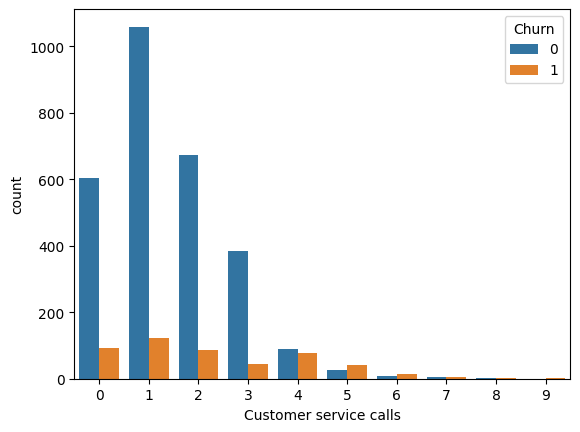

In [154]:
#绘制计数图：使用seaborn的countplot函数绘制Customer service calls与Churn的计数图，hue参数用于区分流失与非流失用户，帮助我们可视化客户服务电话与流失之间的关系
sns.countplot(x="Customer service calls", hue="Churn", data=data)

In [155]:
#Intensive_service_calls_Q列的值为1表示该用户的客户服务电话超过3次，为0表示不超过3次
data['Intensive_service_calls_Q'] = (data['Customer service calls'] > 3).astype('int')
#这行代码创建了一个交叉表，显示Intensive_service_calls_Q（客户服务电话是否超过3次）与Churn（用户是否流失）之间的关系。
pd.crosstab(data['Intensive_service_calls_Q'], data['Churn'], margins=True)

Churn,0,1,All
Intensive_service_calls_Q,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


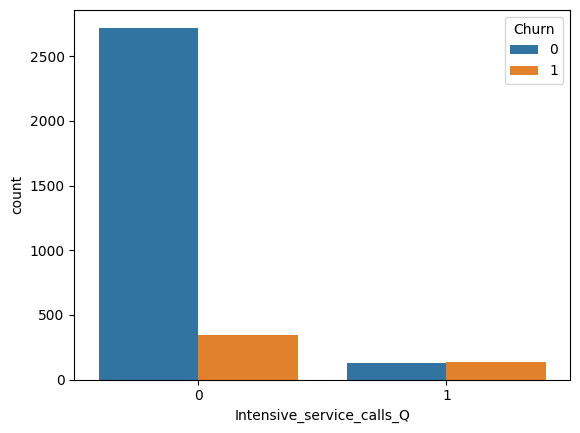

In [156]:
#这行代码使用seaborn的countplot函数绘制了一个计数图，显示Intensive_service_calls_Q与Churn之间的关系。可以帮助我们理解频繁拨打客户服务电话的用户是否更可能流失。
sns.countplot(x='Intensive_service_calls_Q', hue='Churn', data=data);

In [157]:
d = {'No' : 0, 'Yes' : 1}
data['International plan'] = data['International plan'].map(d)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Intensive_service_calls_Q
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


In [158]:
data['Voice mail plan'] = data['Voice mail plan'].map(d)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Intensive_service_calls_Q
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


In [159]:
pd.crosstab(data['Intensive_service_calls_Q'] & data['International plan'] , data['Churn'])

Churn,0,1
row_0,,
0,2841,464
1,9,19


好的，下面我将根据你提供的文件内容，逐步解答每个任务，并提供相应的代码和详细解释。

### Task 1: Exploratory Data Analysis (EDA)

#### 1. 数据加载和初步分析
首先，我们需要加载数据并查看数据的基本信息。

```python
import pandas as pd

# 加载数据
data = pd.read_csv('telecom.csv')

# 查看数据的前五行
print(data.head())

# 查看数据的基本信息
print(data.info())
```

**解释**:
- `pd.read_csv('telecom.csv')`：使用 pandas 加载 CSV 文件。
- `data.head()`：显示数据的前五行，以便快速查看数据的结构和内容。
- `data.info()`：显示数据的基本信息，包括每列的非空值数量和数据类型。

#### 2. 描述性统计
我们可以使用 `describe()` 方法来获取数值型数据的描述性统计信息。

```python
# 获取数值型数据的描述性统计
print(data.describe())

# 获取分类数据的描述性统计
print(data.describe(include=['object', 'bool']))
```

**解释**:
- `data.describe()`：返回数值型列的统计信息，如均值、标准差、最小值、最大值等。
- `data.describe(include=['object', 'bool'])`：返回分类变量的统计信息，如唯一值数量、最常见值及其频率。

#### 3. Churn 分布
我们可以分析 `Churn` 列的分布情况。

```python
# 计算 Churn 的计数
print(data['Churn'].value_counts())

# 计算 Churn 的比例
print(data['Churn'].value_counts(normalize=True))
```

**解释**:
- `data['Churn'].value_counts()`：计算每个类别的数量。
- `data['Churn'].value_counts(normalize=True)`：计算每个类别的比例。

#### 4. 比较统计
计算不同 Churn 状态下的平均值。

```python
# 计算 Churn 为 1 和 0 的平均值
abons_stat = data[data['Churn'] == 1].mean(numeric_only=True)
disertirs_stat = data[data['Churn'] == 0].mean(numeric_only=True)

# 计算比例
ratio = disertirs_stat / abons_stat

# 合并结果
result = pd.concat([abons_stat, disertirs_stat, ratio], axis=1)
result.columns = ['abons', 'disertirs', 'ratio']
print(result.sort_values(by='ratio'))
```

**解释**:
- `data[data['Churn'] == 1].mean(numeric_only=True)`：计算 Churn 为 1 的客户的平均值。
- `data[data['Churn'] == 0].mean(numeric_only=True)`：计算 Churn 为 0 的客户的平均值。
- `ratio`：计算两个平均值的比例，以便比较。

#### 5. 交叉表分析
使用交叉表分析 `Churn` 与 `International plan` 和 `Voice mail plan` 的关系。

```python
# 交叉表分析
print(pd.crosstab(data['Churn'], data['International plan']))
print(pd.crosstab(data['Churn'], data['Voice mail plan']))
```

**解释**:
- `pd.crosstab()`：创建一个交叉表，显示两个分类变量之间的关系。

#### 6. 可视化
使用 Seaborn 绘制 `Customer service calls` 和 `Intensive_service_calls_Q` 的计数图。

```python
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制 Customer service calls 的计数图
sns.countplot(x='Customer service calls', hue='Churn', data=data)
plt.title('Customer Service Calls vs Churn')
plt.show()

# 创建 Intensive_service_calls_Q 列
data['Intensive_service_calls_Q'] = (data['Customer service calls'] > 3).astype('int')

# 绘制 Intensive_service_calls_Q 的计数图
sns.countplot(x='Intensive_service_calls_Q', hue='Churn', data=data)
plt.title('Intensive Service Calls vs Churn')
plt.show()
```

**解释**:
- `sns.countplot()`：绘制计数图，显示不同类别的计数。
- `data['Intensive_service_calls_Q'] = (data['Customer service calls'] > 3).astype('int')`：创建一个新的二元变量，表示客户是否进行了超过 3 次的服务电话。

### Task 2: Introduction to Classification

#### 1. 数据准备
将 `International plan` 列映射为二元值。

```python
# 将 International plan 列映射为 0 和 1
data['International plan'] = data['International plan'].map({'No': 0, 'Yes': 1})
```

**解释**:
- `data['International plan'].map({'No': 0, 'Yes': 1})`：将 `International plan` 列中的 'No' 和 'Yes' 映射为 0 和 1，便于后续建模。

#### 2. 建模
虽然在提供的内容中没有具体的建模步骤，但通常我们会进行以下步骤：

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 特征选择
features = ['Account length', 'Area code', 'International plan', 'Voice mail plan', 
            'Number vmail messages', 'Total day minutes', 'Total day calls', 
            'Total day charge', 'Total eve minutes', 'Total eve calls', 
            'Total eve charge', 'Total night minutes', 'Total night calls', 
            'Total night charge', 'Total intl minutes', 'Total intl calls', 
            'Total intl charge', 'Customer service calls', 'Intensive_service_calls_Q']
X = data[features]
y = data['Churn']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

**解释**:
- `train_test_split()`：将数据集划分为训练集和测试集。
- `LogisticRegression()`：创建逻辑回归模型。
- `model.fit(X_train, y_train)`：训练模型。s
- `model.predict(X_test)`：对测试集进行预测。
- `confusion_matrix()` 和 `classification_report()`：评估模型的性能。

### 总结
以上代码和解释涵盖了数据加载、EDA、可视化、数据准备和分类建模的步骤。你可以根据这些步骤在 Jupyter Notebook 中逐步执行，以完成任务。如果你有任何具体问题或需要进一步的帮助，请告诉我！